<center><font size="+4">Programming and Data Analytics 1 2021/2022</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/StatsAndComputing20212022/raw/main/PDA/jupyter/jupyterNotebooks/images/SSSA.png" width="700" alt="EMbeDS"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

<center><font size="+2">Co-lecturer </font></center>
<center><font size="+2">Daniele Licari d.licari@santannapisa.it</font></center>

---

<center><font size="+4">Lecture 5: </font></center>
<center><font size="+2"> Creation of word clouds for COVID-related online news</font></center>
</center>

---

# Computing and visulatizing the most important words in online news

This example shows that functions can hide a lot of complexity.
* E.g., we can download remote data by just invoking a function
* In particular, in this example we will:
    1.	Download all the articles the online service [NewsAPI](https://newsapi.org/)
    2.	Combine the articles into one document (`str`)
    3.	Clean data
    4.	Compute word-frequency pairs
    5.	Visualize the analysis in a Word Cloud
    
 

*Some definitions:*

A **web service** is an application run by a web server that can be called from a series of URLs that will return their data in a format intended for parsing by a "generic" computer program rather than by a browser. As a result, web services can use something like XML (especially SOAP or so) or JSON is used.

An **Application Programming Interface (API)** allows two systems to communicate with one another. An API exactly defines the methods for one software program to interact with the other. 

![](images/web_server_web_service.png)

This document has been __created by Daniele Licari__ and elaborated by Andrea Vandin.

## The modules we need to use

In [1]:
%pip install newsapi-python
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import requests
# import json
# from pprint import pprint

# api_key='ec0dfba5dadf4bddbfe1ef0f6edf265c'
# json_string = requests.get('https://newsapi.org/v2/everything?q=covid&apiKey='+api_key).text
# obj = json.loads(json_string)
# pprint(obj)

In [3]:
# integrating News API into your Python application 
from newsapi import NewsApiClient 
newsapi = NewsApiClient(api_key='345f8a0aa8c64d549fde1d8343d036f8')

# creating wordclouds into your Python application 
from wordcloud import WordCloud, STOPWORDS

#  In Python, string.punctuation will give the all sets of punctuation. 
import string

import matplotlib.pyplot as plt

__NewsApiClient__ is a local client for the online service [__NewsAPI__](https://newsapi.org/) that allows you to get news from [eveywhere in the world](https://newsapi.org/sources)
* Intuitively, an online service is like an online function running in a remote server (computer)
* A local client is a piece of code runnning in your machine that communicates with the online service
  * It allows you to easily interact with the online service
  * The interaction is typically done through a set of message exchanges as prescribed by the APIs of the service
* The argument `api_key` is a univoque identifier 
  * necessary when making requests to be identified
  * can be obtained registering [here](https://newsapi.org/register)

There exist many online services accessible with Python
* Most of them follow this api-key approach
* E.g. to enforce subscriptions
<!-- * In our case, __we are using a free subscription that allows us to only get the first 250 characters from a news item__ -->

## Implementing two functions for data cleaning

__Stop words__ are usually the most common words in any text ( like “the”, “of”, “to” and “and”), 
* They don’t tell us much about the actual content in a text
* These are the words we want to ignore - this is our data cleaning

We want to find the words that will help us differentiate a text from texts that are about different subjects. 
* __We will filter out the common words__.
* Of course, we are going to use a function for doing this

Furthermore, we want to ignore punctuation 
* In Python, string.punctuation will give the all sets of punctuation.
* We are going to use it to delete all punctuation from a string

In [4]:
# to remove STOPWORDS
def remove_stopwords(wordlist):
    return [w for w in wordlist if (w not in STOPWORDS) and (w not in {'usa','today','verge','bbc','cnn'})]

# to remove Punctuations
def remove_punctuations(my_str): 
    no_punct = ""
    for char in my_str:
        if char  not in string.punctuation:
            no_punct = no_punct + char
    return no_punct

## Data loading

We first get the most relevant articles (top 100) about coronavirus, published in usa-today
* This looks like a normal function invocation
* But under the hood a lot happens to contact the remote service 
(https://newsapi.org/v2/everything?q=coronavirus&sources=usa-today&language=en&pageSize=100&sortBy=relevancy&apiKey=345f8a0aa8c64d549fde1d8343d036f8)

Luckily, the function `get_everything` hides this complexity to us

In [5]:
json_data = newsapi.get_everything(q='coronavirus',        # All the articles that contain this word
                                    language='en',
                                    sources = 'usa-today', # The newspaper of interest
                                    #sources = 'cnn', # The newspaper of interest
                                    #sources = 'bbc-news', # The newspaper of interest
                                    #sources = 'bbc-news,the-verge'
                                    #
                                    page_size=100,           # Get 100 articles
                                    sort_by='relevancy' 
                                    )
#There exist many more parameters allowing us the ask for more articles, different sources, etc

The return value `json_data` is just a dictionary collecting information about the remote request

In [6]:
print(type(json_data))
print()
print(json_data.keys())
print()
print('The status of the request is',json_data['status'],'There are ',json_data['totalResults'],'articles matching the request.')
print('We got',len(json_data['articles']),'articles')
print()

<class 'dict'>

dict_keys(['status', 'totalResults', 'articles'])

The status of the request is ok There are  200 articles matching the request.
We got 100 articles



We can ignore all the metadata (i.e. the data about the remote request) and focus on the actual articles only

In [7]:
articles = json_data['articles'] 

#Get the description of the first article
content = articles[0]['description']
print('The content:')
print(content)
print('The content is long',len(content),"characters")

The content:
The FBI on Saturday searched the headquarters of a nationwide string of coronavirus testing sites known as the Center for COVID Control. More updates.
The content is long 150 characters


Now let's combine the content of all the news into variable `contents`

In [8]:
def combine_articles(list_of_articles):
    contents = ''
    for article in list_of_articles:
         #  check if key 'description' has Non-None value in dictionary 
        if article['description']:
            contents += article['description']+" "
            
    return contents

contents = combine_articles(articles)
print('Overall we have',len(contents),'characters')

Overall we have 13845 characters


## Data cleaning, manipulation and visualization 

Now begins the funny part
1. Let's clean the data removing not interesting words
2. Let's compute the frequency of use of words
3. Let's visualize graphically the computed analysis - Word Cloud

In [10]:
# 1 cleaning data
def clean_data(contents):
    print('Before cleaning')
    print(contents[:600])
    print()

    content_to_clean = contents.lower()
    clean_content = remove_punctuations(content_to_clean).split()
    clean_content = remove_stopwords(clean_content)
    print('After cleaning')
    print(clean_content[:200])
    print()
    return clean_content

clean_content = clean_data(contents)

Before cleaning
The FBI on Saturday searched the headquarters of a nationwide string of coronavirus testing sites known as the Center for COVID Control. More updates. Millions of free coronavirus test kits will arrive at Americans' homes over the coming days. When to use them and how they work. Long COVID is probably a wide array of diseases, say experts, who continue to study the mysterious lingering symptoms faced by some who get COVID-19. The average daily death toll during the omicron surge has surpassed the daily toll seen when the more severe delta variant dominated. Latest COVID news. USA TODAY is hono

After cleaning
['fbi', 'saturday', 'searched', 'headquarters', 'nationwide', 'string', 'coronavirus', 'testing', 'sites', 'known', 'center', 'covid', 'control', 'updates', 'millions', 'free', 'coronavirus', 'test', 'kits', 'will', 'arrive', 'americans', 'homes', 'coming', 'days', 'use', 'work', 'long', 'covid', 'probably', 'wide', 'array', 'diseases', 'say', 'experts', 'continue'

In [11]:
# 2 computing word-frequency pairs
def analyze_data(clean_content):
    wordcount = {}
    for w in clean_content:
        if w in wordcount:
            wordcount[w] += 1
        else:
            wordcount[w] = 1
    return wordcount

wordcount = analyze_data(clean_content)

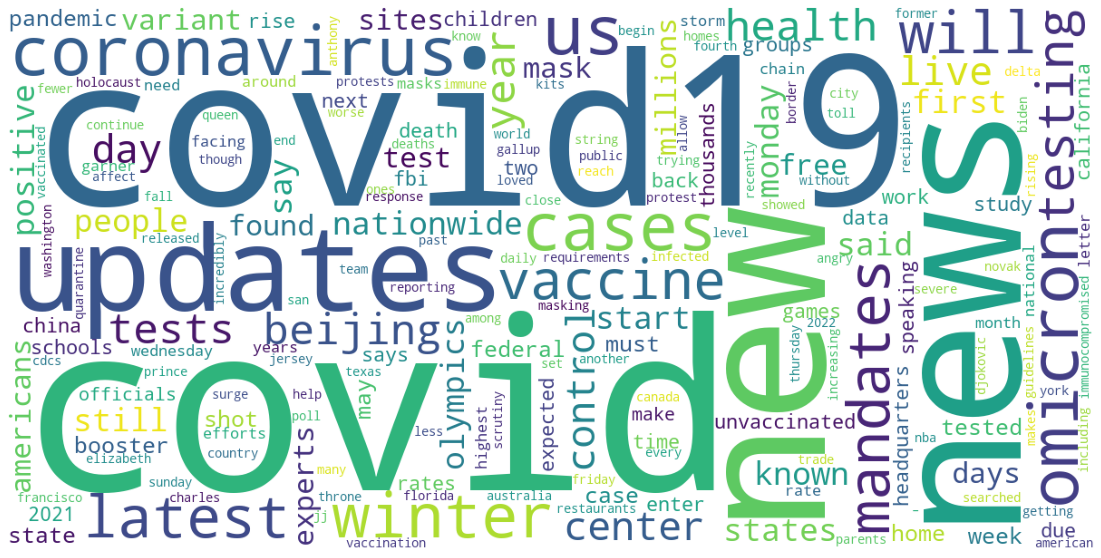

In [12]:
# 3 visualizing the analysisis in a Word Cloud
def visualize_data(wordcount):
    wc = WordCloud(width=1200,height=600, background_color='white').generate_from_frequencies(wordcount)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

visualize_data(wordcount)

## Let's put everything in a function, so that we can run it easily for different sources

In [13]:
# integrating News API into your Python application 
from newsapi import NewsApiClient 
newsapi = NewsApiClient(api_key='345f8a0aa8c64d549fde1d8343d036f8')

# creating wordclouds into your Python application 
from wordcloud import WordCloud, STOPWORDS

# regular expression 
import re

import matplotlib.pyplot as plt

def make_world_cloud(query,source,p_size):
    """
    gets articles that contain 'query'  p_size
    """
    # 1.  Download all the articles the online service NewsAPI
    json_data = newsapi.get_everything(q=query,           # All the articles that contain this word
                                       language='en',
                                       sources=source,      # The newspaper of interest
                                       page_size=p_size,  # Get 50 articles
                                       sort_by='relevancy'   
                                    )
    
    # 2. Combine the articles into one document (string)
    contents = combine_articles(json_data['articles'])
    
    # 3. cleaning data
    clean_content = clean_data(contents)

    # 4. computing word-frequency pairs
    wordcount = analyze_data(clean_content)
 
    # 5. Visualizing the analysis in a Word Cloud
    visualize_data(wordcount)

Before cleaning
Sen. Amy Klobuchar has spent the last few months authoring new legislation targeting the power of Big Tech. Amazon, Apple, Facebook, and Google are spooked. The messaging around whether or not to wear N95 masks to prevent transmission of the coronavirus has been confusing, but the CDC now says the tighter-fitting masks offer more protection than cloth masks. The Centers for Disease Control has launched the National Wastewater Surveillance System to help track trends of the COVID-19 through community feces. The new tool collects and present percentage data in 15-day intervals and allows for com

After cleaning
['sen', 'amy', 'klobuchar', 'spent', 'last', 'months', 'authoring', 'new', 'legislation', 'targeting', 'power', 'big', 'tech', 'amazon', 'apple', 'facebook', 'google', 'spooked', 'messaging', 'around', 'whether', 'wear', 'n95', 'masks', 'prevent', 'transmission', 'coronavirus', 'confusing', 'cdc', 'now', 'says', 'tighterfitting', 'masks', 'offer', 'protection', 'cl

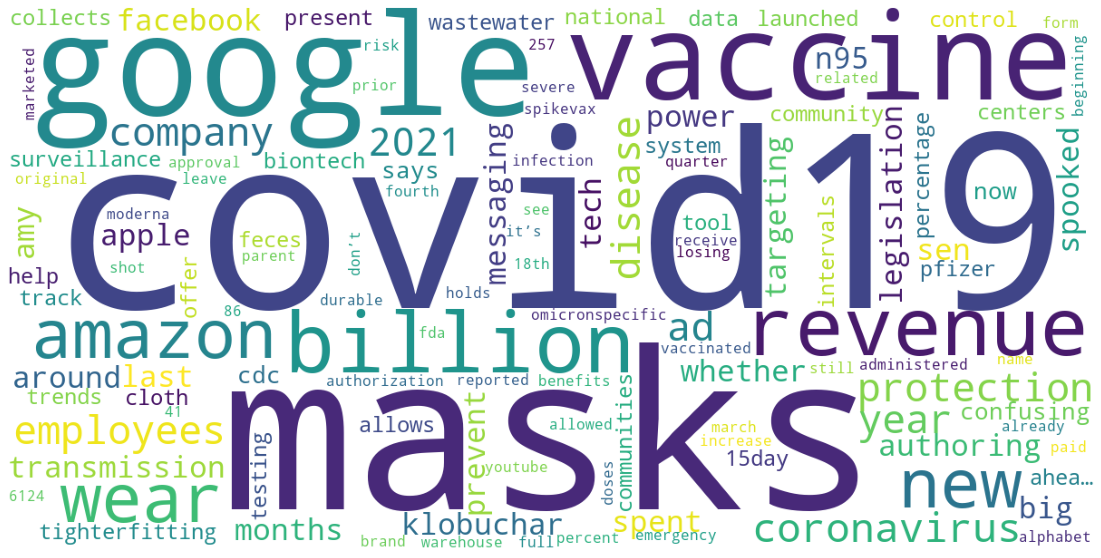

In [14]:
make_world_cloud('coronavirus','the-verge',100)

In [ ]:
make_world_cloud('coronavirus','bbc-news',100)

# Excercizes

## Advanced data cleaning
Write an advanced function for data cleaning using [spaCy](https://spacy.io/) in order to:

- **Keep alphabetic characters** 
- **Remove stopwords**
- **Keep only nouns and pronouns**

In some Natural Language Processing tasks, it can be useful to remove the insignificant words by looking at their part-of-speech tags (noun, pronoun, verb, adjective, adverb, preposition, conjunction, etc). 
You will need to create a function to keep only nouns and pronouns from a text.

![image.png](images/pos_tagging.png)

- **Getting lemmas: Text Normalization:**

A word can have a high degree of inflection (study, studying, studies). You will need to create a function to normalize the text that transforms an inflected word into its dictionary form (cars -> car). 


![](images/lemmatization.png)

It returns the base or dictionary form of a word, which is known as the lemma


### Spacy
[spaCy](https://spacy.io/) is a Python library to make programs that work with natural language. 
**We will use spaCy for the pos tagging and lemmatization**

In [ ]:
# install spaCy
%pip install spacy

we download a trained [small model](https://spacy.io/models/en#en_core_web_sm)  for English 

In [2]:
import spacy
import spacy.cli
# download small model for English 
spacy.cli.download("en_core_web_sm")
# load English model
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [6]:
txt = "Apple is looking at buying U.K. startups for $1 billion"
# spacy parses the text
doc = nlp(txt) 

# token represents a word of the text
for token in doc:
    print(token.text, token.lemma_, token.pos_,token.is_alpha, token.is_stop)

######  token attributes  ######
# Text: The original word text.
# Lemma: The base form of the word.
# POS: The simple UPOS part-of-speech tag.
# is alpha: Is the token an alpha character?
# is stop: Is the token part of a stop list, i.e. the most common words of the language?


Apple Apple PROPN True False
is be AUX True True
looking look VERB True False
at at ADP True True
buying buy VERB True False
U.K. U.K. PROPN False False
startups startup NOUN True False
for for ADP True True
$ $ SYM False False
1 1 NUM False False
billion billion NUM True False


*Note: part-of-speech tag for noun and pronoun are 'NOUN' and 'PROPN'*


Now, you are able to perform the exercise:
## Statement

Write a function 

- named `advanced_clean_data`
- that has two arguments, a string `text` and spaCy model `nlp`, in this order
- that returns the list of available lemmas in  string `text` for nouns and pronouns that contain only alphabetic characters and are not stopwords 



In [17]:

def advanced_clean_data(text, nlp):
    """ 
    this data cleaning function applies the following filters to words contained in text::
        - alphabetic characters only,
        - nouns and pronouns only
        - removing stopwords
    
    :param text: text we want to clean:
    :param nlp: spacy model 
    
    :return: clean the text and return the list of lemma forms in 'text'

    """
    # convert text into sequence of Spacy Tokens
    doc = nlp(text)
    
    cleaned_data = []
    ### TO COMPLETE ####
    
    
    return cleaned_data

In [18]:
## Example Output
text = "Python is the language of 2021 in the TIOBE index (most increase in ratings in one year)."
advanced_clean_data(text, nlp)

['Python', 'language', 'TIOBE', 'index', 'increase', 'rating', 'year']

## WordCloud with advanced Data cleaning
Write a new function make_world_cloud_advanced (similar to make_world_cloud)  to plot a WordCloud using the new Data cleaning proces


In [21]:
def make_world_cloud_advanced(query,source,p_size,nlp):  
    """
    make a Word CLoud by downloading number 'p_size' articles from 'source' using NewsAPI
    and use advanced_clean_data function for data cleaning 
    :param query: word contained in 
    :param sour: spacy model 
    """
    # ... TO COMPLETE

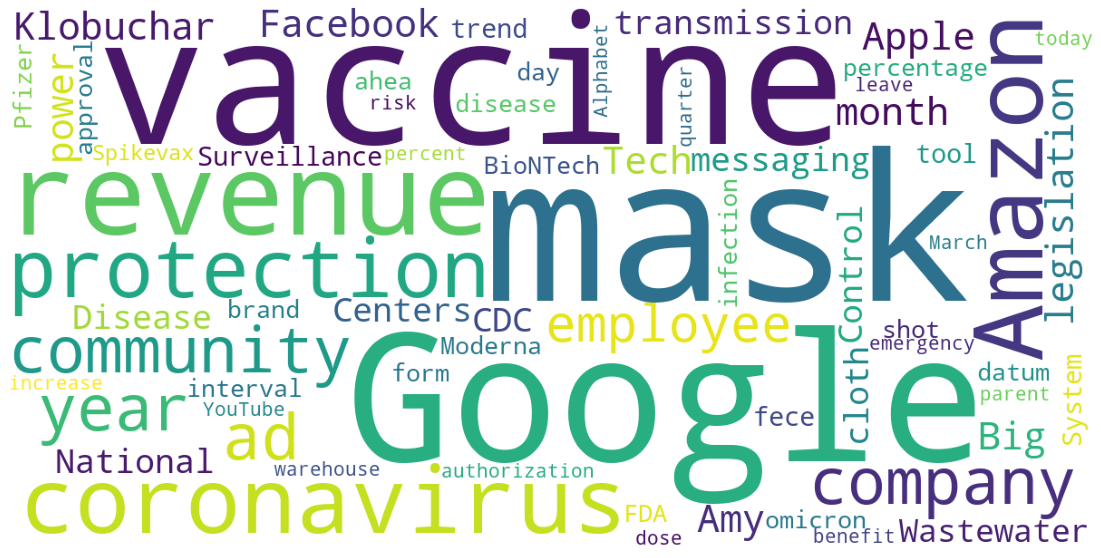

In [22]:
## Example (similar) Output 
make_world_cloud_advanced('coronavirus','the-verge',100,nlp)

# Sentiment Analysis
Write a Sentiment analysis function `sentiment_score` takes a string `text` as input and returns a sentiment score (integer) .  
 
The sentiment score of the article will be obtained by the difference between the occurrences of positive and negative words in a text.
` score = frequency of positive words - frequency of negative words`

The positive and negative words lists will be provided by the variables `negative_words_list` and `positive_words_list`. 

- score > 0 expresses a positive sentiment
- score < 0 expresses a negative sentiment


In [36]:
# load list of negative words
with open('assignments/negative-words.txt') as f:
    negative_words_list = [line for line in f.read().split('\n')]
# load list of potive words    
with open('assignments/positive-words.txt') as f:
    positive_words_list = [line for line in f.read().split('\n')]

In [ ]:
def sentiment_score(text):


In [50]:
text = 'I had a bad and frustrating experience with Fastweb'    
sentiment_score(text) 


-2

Write a function that returns the overall score on a given content topic by analyzing the sentiment of the 100 most relevant articles (description) on the topic. 

Try to compare the result between different sources.

In [ ]:
def sentiment_analysis(query,source):
    
    json_data = newsapi.get_everything(q=query,           # All the articles that contain this word
                                       language='en',
                                       sources=source,      # The newspaper of interest
                                       page_size=100,  # Get 100 articles
                                       sort_by='relevancy'   
                                    )
    

    for article in json_data['articles']
         #  check if key 'description' has Non-None value in dictionary 
        if article['description']:
            article['sentiment_score'] = sentiment_score(article['description'])
        

In [20]:
a = input()

 23


In [33]:
print(a[0], a[1])



2 3


In [37]:
a = 5
print(a)

5


In [52]:
age = input()
print(int(age)+2)

 534


536


In [56]:
5/2

2.5

In [59]:
a = int(input())
print(a//10, a%10)

 23


2 3
